In [10]:
import scanpy as sc
import portal
import os

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [58]:
dd

,gene_ids,feature_types,highly_variable,highly_variable_rank,means,variances,variances_norm
4933401J01Rik,ENSMUSG00000102693,Gene Expression,False,NaN,0.000000,0.000000,0.000000
Gm26206,ENSMUSG00000064842,Gene Expression,False,NaN,0.000000,0.000000,0.000000
Xkr4,ENSMUSG00000051951,Gene Expression,False,NaN,0.001837,0.001987,0.950456
Gm18956,ENSMUSG00000102851,Gene Expression,False,NaN,0.000000,0.000000,0.000000
Gm37180,ENSMUSG00000103377,Gene Expression,False,NaN,0.001378,0.001529,0.991801
...,...,...,...,...,...,...,...
mt-Nd6,ENSMUSG00000064368,Gene Expression,False,NaN,0.587218,0.951689,0.943188
mt-Te,ENSMUSG00000064369,Gene Expression,False,NaN,0.000230,0.000230,0.977254
mt-Cytb,ENSMUSG00000064370,Gene Expression,False,NaN,63.840796,3595.332276,0.970170
mt-Tt,ENSMUSG00000064371,Gene Expression,False,NaN,0.030080,0.030249,0.737250


In [3]:
import os

adata_list_name = ['L41344', 'L41345', 'L41346_1', 'L41347', 'L41348', 'L41349']
adata_list_anno = ['tm0','tm7','tm14','tm21','tm30', 'tm60']
adata_all = [sc.read_10x_mtx(os.path.join("/Users/clintli/Downloads/matrices/", name, "filtered_feature_bc_matrix"))
            for name in adata_list_name]

meta_list = [adata.obs for adata in adata_all]
for meta, anno in zip(meta_list, adata_list_anno):
    meta['treatment_day'] = anno
 
    


NameError: name 'pd' is not defined

In [12]:
import pandas as pd
meta = pd.concat(meta_list)
adata_all = portal.utils.filtering(adata_all)
lowdim_list, hvg, mean, std, pca = portal.utils.preprocess_recover_expression(adata_all)
expression_scaled, expression_log_normalized, embed = portal.utils.integrate_recover_expression(lowdim_list, mean, std, pca) 

Finding highly variable genes...


/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/clintli/Downloads/matrices/Portal/portal/utils.py:117: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  hvg_total = hvg_total & hvg
/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/clintli/Downloads/matrices/Portal/portal/utils.py:117: FutureWarning: Index.__and__ operating as a set operation is deprec

Normalizing and scaling...


/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/pyth

/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/pyth

Dimensionality reduction via PCA...
Incrementally integrating 6 datasets...
Integrating the 2-th dataset to the 1-st dataset...
Begining time:  Sat Nov 26 20:35:33 2022
step 0, loss_D=7.870948, loss_GAN=2.576278, loss_AE=160.271576, loss_cos=40.307800, loss_LA=133.530121
step 200, loss_D=2.298118, loss_GAN=3.222226, loss_AE=9.625698, loss_cos=5.564139, loss_LA=2.456418
step 400, loss_D=1.649993, loss_GAN=3.451267, loss_AE=5.187652, loss_cos=3.401701, loss_LA=1.134898
step 600, loss_D=2.154053, loss_GAN=3.197958, loss_AE=4.599452, loss_cos=3.361398, loss_LA=0.944723
step 800, loss_D=1.994454, loss_GAN=3.242538, loss_AE=4.334032, loss_cos=3.256161, loss_LA=0.711811
step 1000, loss_D=1.827990, loss_GAN=3.377979, loss_AE=3.866369, loss_cos=2.998225, loss_LA=0.571883
step 1200, loss_D=2.096882, loss_GAN=3.324188, loss_AE=3.649204, loss_cos=3.078836, loss_LA=0.546506
step 1400, loss_D=2.138310, loss_GAN=3.832580, loss_AE=4.076362, loss_cos=3.522125, loss_LA=0.501269
step 1600, loss_D=1.88023

ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
expression_scaled.shape

(57210, 1438)

In [34]:
adata_all[2]

AnnData object with n_obs × n_vars = 7817 × 55421
    obs: 'treatment_day'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'

In [17]:
meta

,type
AAACCCAAGAGTCAGC-1,adata_1
AAACCCAAGCCAAGTG-1,adata_1
AAACCCAAGCTAGAAT-1,adata_1
AAACCCAAGGGCAGGA-1,adata_1
AAACCCACACGCGGTT-1,adata_1
...,...
TTTGTTGGTGCGGTAA-1,adata_2
TTTGTTGTCGCTTGAA-1,adata_2
TTTGTTGTCGGTCAGC-1,adata_2
TTTGTTGTCGGTCATA-1,adata_2


UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Thu Nov 24 12:20:35 2022 Construct fuzzy simplicial set
Thu Nov 24 12:20:35 2022 Finding Nearest Neighbors
Thu Nov 24 12:20:35 2022 Building RP forest with 17 trees
Thu Nov 24 12:20:35 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 24 12:20:37 2022 Finished Nearest Neighbor Search
Thu Nov 24 12:20:38 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Nov 24 12:21:06 2022 Finished embedding


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


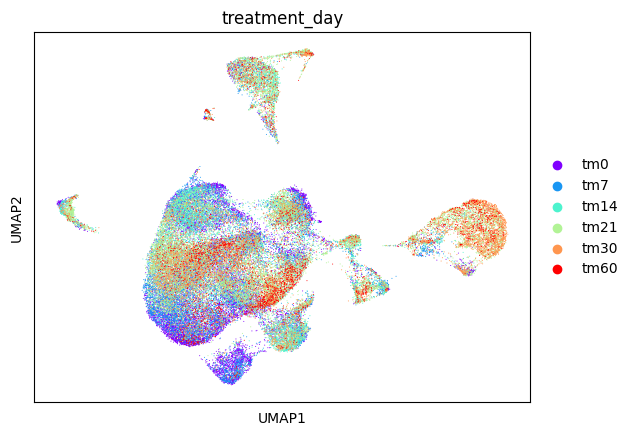

In [28]:
portal.utils.plot_UMAP(integrated_data, meta, colors=['treatment_day'], save=True, result_path='./')

In [37]:
meta.index

Index(['AAACCCAAGAGTCAGC-1', 'AAACCCAAGCCAAGTG-1', 'AAACCCAAGCTAGAAT-1',
       'AAACCCAAGGGCAGGA-1', 'AAACCCACACGCGGTT-1', 'AAACCCACAGTTGTTG-1',
       'AAACCCACATGGCGCT-1', 'AAACCCAGTACTAGCT-1', 'AAACCCATCACTGATG-1',
       'AAACCCATCCTACACC-1',
       ...
       'TTTGATCGTGAGCAGT-1', 'TTTGATCTCCTCATAT-1', 'TTTGGAGCATACAGGG-1',
       'TTTGGAGGTTCCGTTC-1', 'TTTGGTTAGAGAAGGT-1', 'TTTGGTTAGTAAACAC-1',
       'TTTGGTTAGTGTAGTA-1', 'TTTGTTGCAATGGCAG-1', 'TTTGTTGTCCCGAACG-1',
       'TTTGTTGTCTACAGGT-1'],
      dtype='object', length=57210)

In [39]:
import anndata
adata = anndata.AnnData(X=integrated_data)
adata.obs.index = meta.index
adata.obs = pd.concat([adata.obs, meta], axis=1)
adata.var.index = "dim-" + adata.var.index
adata.obsm["latent"] = integrated_data

In [46]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


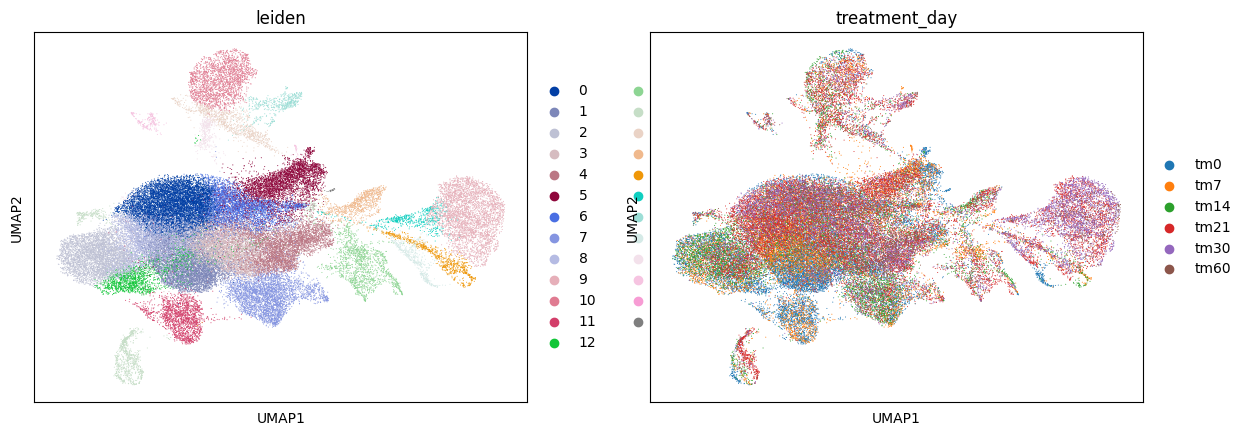

In [49]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden','treatment_day'])

In [35]:
!ls

LICENSE                  download.png             models
Portal_TM_analysis.ipynb environment.yml          portal
README.md                latent-treatment_day.pdf
data                     latent-type.pdf


In [ ]:
a